 # Linear Quadratic Optimal Control

Consider the following system

$$
\begin{cases}
\dot{x_1}&=&x_2,\\
\dot{x_2}&=&u,\\
y&=&x_1
\end{cases}
\Rightarrow
\begin{cases}
\dot{x}=\begin{pmatrix}
0 & 1 \\
0 & 0
\end{pmatrix}
x+
\begin{pmatrix}
0 \\ 1
\end{pmatrix}
,\\
y=\begin{pmatrix}
1 & 0
\end{pmatrix}
u
\end{cases}
$$

with initial state of

$$
x(0)=
\begin{pmatrix}
1 & 2\\
\end{pmatrix}
^T
$$

And the cost function is:

$$
J = \int ^ \infty _0  [
x^T
\begin{pmatrix}
1 & 0 \\
 0 & 0
\end{pmatrix}
x
+
u^2
]\mathrm{d} t
$$

try to use **Linear Quadratic Optimal Control** to control the system.


 ## Parameters of State Space model

 use [numpy](https://numpy.org/doc) to store data for parameters of State Space Model

In [1]:
import matplotlib.pyplot as plt
from control.matlab import *
import numpy as np
A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1]])
C = np.array([1, 0])
D = np.zeros((1, 1))
x0 = np.array([[1], [2]])

 ## State Space Model

 construct a State Space Model with python [control](https://python-control.readthedocs.io/) library and check its **controllability** and **observability**

In [2]:
G = ss(A, B, C, D)
Sc = ctrb(A, B)
So = obsv(A, C)
n = A.shape[0]
rank_Sc = np.linalg.matrix_rank(Sc)
rank_So = np.linalg.matrix_rank(So)
text_c = "controllable" if rank_Sc == n else "uncontrollable"
text_o = "observable" if rank_So == n else "unobservable"
print("rank(Sc)=%d. The system is %s" % (rank_Sc, text_c))
print("rank(So)=%d. The system is %s" % (rank_So, text_o))

rank(Sc)=2. The system is controllable
rank(So)=2. The system is observable


 ## Optimal Control with LQR

 design the control signal `u` with *Linear Quadratic Optimal Control Law* with function [control.matlab.lqr](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.lqr.html#control-matlab-lqr)

In [3]:
Q = np.array([[1, 0], [0, 0]])
R = 1
K, S, E = lqr(A, B, Q, R)
J_star = 1/2*x0.transpose()*S*x0
A2 = A-B*K
B2 = np.zeros(B.shape)
G2 = ss(A2, B2, C, D)
print("K = [%.4f %.4f] and u=-K*x" % (K[0, 0], K[0, 1]))
print("J = %.4f in this control law" % J_star)

K = [1.0000 1.4142] and u=-K*x
J = 5.5355 in this control law


 ## State Response under Optimal Control

 use [matplotlib](https://matplotlib.org/) to plot the initial response with function [control.matlab.initial](#https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.initial.html)

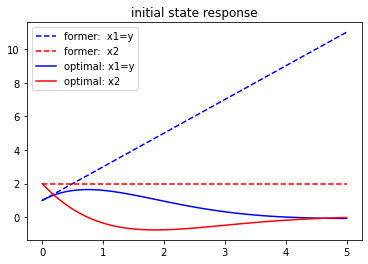

In [4]:
Tfinal = 5
Yout, T, Xout = initial(G, T=Tfinal, X0=x0, input=None,
                        output=None, return_x=True)
plt.plot(T, Xout[:, 0], 'b--', label='former:  x1=y')
plt.plot(T, Xout[:, 1], 'r--', label='former:  x2')
Yout, T, Xout = initial(G2, T=Tfinal, X0=x0, input=None,
                        output=None, return_x=True)
plt.plot(T, Xout[:, 0], 'b', label='optimal: x1=y')
plt.plot(T, Xout[:, 1], 'r', label='optimal: x2')
plt.title('initial state response')
plt.legend()
plt.show()